In [1]:
# iHMM

In [2]:
import numpy as np
import pandas as pd  
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:
col_names = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','RainY0','RainN0']
dataset=pd.read_csv("D:/data/tan/train_ANN1.csv",header=None,names=col_names)
dataset.head(5)  

,Frost_pt,Temp_MAX,Temp_MIN,Specific_Hum,Relative_Hum,Winds_Max,Winds_Min,RainY0,RainN0
0,0.40,19.01,7.75,4.03,46.31,1.68,0.44,0,1
1,0.89,20.65,8.19,4.21,43.44,1.91,0.69,0,1
2,1.78,21.88,9.58,4.58,46.19,3.71,0.72,1,0
3,5.84,21.40,7.73,5.92,64.12,4.48,1.26,0,1
4,3.69,19.09,5.12,5.13,62.69,2.29,0.28,0,1


In [4]:
y = dataset.RainY0
X = dataset.iloc[:, 0:7].values  

In [5]:
#x

In [6]:
#y

In [7]:
observations = np.array(X)
observations

array([[ 0.4 , 19.01,  7.75, ..., 46.31,  1.68,  0.44],
       [ 0.89, 20.65,  8.19, ..., 43.44,  1.91,  0.69],
       [ 1.78, 21.88,  9.58, ..., 46.19,  3.71,  0.72],
       ...,
       [ 8.3 , 18.55,  9.25, ..., 72.88,  1.78,  0.2 ],
       [ 5.81, 20.12,  7.72, ..., 67.69,  1.77,  0.58],
       [ 5.13, 20.74,  8.46, ..., 60.31,  2.2 ,  0.89]])

In [8]:
rain_states = np.array(y)

In [9]:
#rain_states

In [10]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(observations, rain_states, test_size=0.10, random_state=149)

In [11]:
#X_train

In [12]:
# Create a Gaussian HMM model
model = hmm.GaussianHMM(n_components=2)

In [13]:
# Train the model using the training data
model.fit(X_train)

GaussianHMM(n_components=2)

In [14]:
# Estimate rain for the test set
predicted_rain_states = model.predict(X_test)

In [15]:
predicted_rain_states

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [16]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, predicted_rain_states)

Confusion Matrix:
[[274  23]
 [ 49  93]]


Text(0.5, 1.0, 'Naive-bayes (Model-HM-0)')

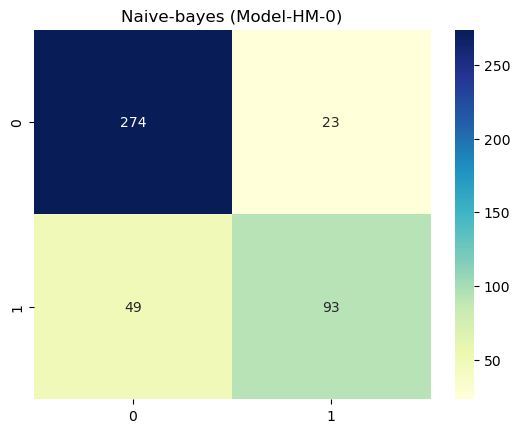

In [17]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Labels check karne hai
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
labels = ["Rain", "Not Rain"]
cm=confusion_matrix(y_test, predicted_rain_states)
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu",fmt='g')
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#disp.plot();
plt.title('Naive-bayes (Model-HM-0)')
#

In [18]:
# Compute classification metrics
report = classification_report(y_test, predicted_rain_states)
# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       297
           1       0.80      0.65      0.72       142

    accuracy                           0.84       439
   macro avg       0.83      0.79      0.80       439
weighted avg       0.83      0.84      0.83       439



In [19]:
rain_probabilities = model.predict_proba(X_test)[:, 1]

In [20]:
# Compute the false positive rate, true positive rate, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rain_probabilities)

In [21]:
# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

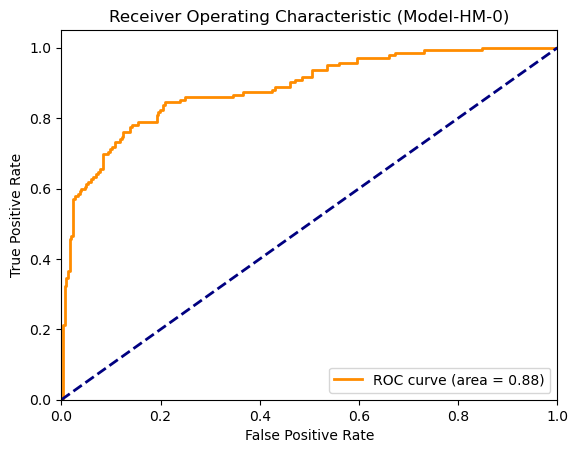

In [22]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Model-HM-0)')
plt.legend(loc="lower right")
plt.show()

In [23]:
#Jan
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i01J.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01 = df01.iloc[:, 0:7].values  
y_pred = model.predict(X01)  

d={
'Actual':df01.Rain,
'Predicted':y_pred}
df1 = pd.DataFrame(d)
print("Jan")
print(df1)


Jan
    Actual  Predicted
0        0          1
1        0          0
2        0          0
3        0          0
4        1          0
5        1          0
6        0          0
7        1          0
8        1          0
9        1          0
10       1          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       1          0
20       0          0
21       1          0
22       1          0
23       1          0
24       1          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0
30       0          0


In [24]:
#Feb
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i02F.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01 = df01.iloc[:, 0:7].values  
y_pred = model.predict(X01)  

d={
'Actual':df01.Rain,
'Predicted':y_pred}
df1 = pd.DataFrame(d)
print("Feb")
print(df1)

Feb
    Actual  Predicted
0        0          1
1        0          0
2        1          0
3        1          0
4        0          0
5        0          0
6        0          0
7        1          0
8        1          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       1          0
26       0          0
27       0          0


In [25]:
#Mar
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i03M.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01 = df01.iloc[:, 0:7].values  
y_pred = model.predict(X01)  

d={
'Actual':df01.Rain,
'Predicted':y_pred}
df1 = pd.DataFrame(d)
print("Mar")
print(df1)

Mar
    Actual  Predicted
0        0          1
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0
30       0          0


In [26]:
#Apr
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i04A.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01 = df01.iloc[:, 0:7].values  
y_pred = model.predict(X01)  

d={
'Actual':df01.Rain,
'Predicted':y_pred}
df1 = pd.DataFrame(d)
print("Apr")
print(df1)

Apr
    Actual  Predicted
0        0          1
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0


In [27]:
#May
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i05M.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01 = df01.iloc[:, 0:7].values  
y_pred = model.predict(X01)  

d={
'Actual':df01.Rain,
'Predicted':y_pred}
df1 = pd.DataFrame(d)
print("May")
print(df1)

May
    Actual  Predicted
0        0          1
1        0          0
2        0          0
3        1          0
4        1          0
5        0          0
6        0          0
7        1          0
8        1          0
9        1          0
10       1          0
11       1          0
12       1          0
13       0          0
14       0          0
15       0          0
16       1          0
17       0          0
18       0          0
19       1          0
20       1          0
21       1          0
22       1          0
23       1          0
24       0          0
25       0          0
26       0          0
27       1          0
28       1          0
29       0          0
30       0          0


In [28]:
#Jun
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i06J.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01 = df01.iloc[:, 0:7].values  
y_pred = model.predict(X01)  

d={
'Actual':df01.Rain,
'Predicted':y_pred}
df1 = pd.DataFrame(d)
print("Jun")
print(df1)

Jun
    Actual  Predicted
0        0          1
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       1          0
12       0          0
13       0          0
14       0          0
15       1          0
16       1          0
17       1          0
18       1          0
19       1          0
20       1          0
21       0          0
22       1          0
23       0          0
24       0          0
25       1          0
26       1          1
27       1          1
28       1          1
29       1          1


In [29]:
#Jul
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i07J.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01 = df01.iloc[:, 0:7].values  
y_pred = model.predict(X01)  

d={
'Actual':df01.Rain,
'Predicted':y_pred}
df1 = pd.DataFrame(d)
print("Jul")
print(df1)

Jul
    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        0          1
4        1          1
5        1          1
6        0          1
7        1          1
8        1          1
9        1          1
10       1          1
11       1          1
12       1          1
13       1          1
14       0          1
15       1          1
16       1          1
17       1          1
18       1          1
19       1          1
20       1          1
21       1          1
22       1          1
23       1          1
24       1          1
25       1          1
26       1          1
27       1          1
28       1          1
29       1          1
30       1          1


In [30]:
#Aug
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i08A.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01 = df01.iloc[:, 0:7].values  
y_pred = model.predict(X01)  

d={
'Actual':df01.Rain,
'Predicted':y_pred}
df1 = pd.DataFrame(d)
print("Aug")
print(df1)

Aug
    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        1          1
4        1          1
5        0          1
6        1          1
7        0          1
8        0          1
9        1          1
10       1          1
11       0          1
12       0          1
13       1          1
14       1          1
15       0          1
16       0          1
17       0          1
18       1          1
19       1          1
20       0          1
21       1          1
22       1          1
23       1          1
24       1          1
25       0          1
26       0          1
27       1          1
28       1          1
29       1          1
30       0          1


In [31]:
#spt
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i09S.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01 = df01.iloc[:, 0:7].values  
y_pred = model.predict(X01)  

d={
'Actual':df01.Rain,
'Predicted':y_pred}
df1 = pd.DataFrame(d)
print("spt")
print(df1)

spt
    Actual  Predicted
0        1          1
1        1          1
2        0          1
3        0          1
4        0          1
5        0          1
6        1          1
7        1          1
8        1          1
9        1          1
10       1          1
11       1          1
12       1          1
13       1          1
14       1          1
15       1          1
16       1          1
17       1          1
18       1          1
19       1          1
20       1          1
21       1          1
22       1          1
23       1          1
24       1          1
25       1          1
26       0          1
27       0          1
28       0          1
29       0          1


In [32]:
#OCT
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i10O.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01 = df01.iloc[:, 0:7].values  
y_pred = model.predict(X01)  

d={
'Actual':df01.Rain,
'Predicted':y_pred}
df1 = pd.DataFrame(d)
print("OCT")
print(df1)

OCT
    Actual  Predicted
0        1          1
1        1          1
2        0          1
3        0          1
4        1          1
5        1          1
6        1          1
7        1          1
8        1          1
9        1          1
10       1          1
11       1          1
12       0          1
13       0          1
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0
30       0          0


In [33]:
#Nov
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i11N.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01 = df01.iloc[:, 0:7].values  
y_pred = model.predict(X01)  

d={
'Actual':df01.Rain,
'Predicted':y_pred}
df1 = pd.DataFrame(d)
print("Nov")
print(df1)

Nov
    Actual  Predicted
0        0          1
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0


In [34]:
#Dec
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i12D.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01 = df01.iloc[:, 0:7].values  
y_pred = model.predict(X01)  

d={
'Actual':df01.Rain,
'Predicted':y_pred}
df1 = pd.DataFrame(d)
print("Dec")
print(df1)

Dec
    Actual  Predicted
0        0          1
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0
30       0          0
